In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership functions
# Create the three fuzzy variables - two inputs, one output
Temp  = ctrl.Antecedent(np.arange(0,80,1),"Temp") # Unit is fahrenheit
TempR = ctrl.Antecedent(np.arange(-50,50,1),"TempR") # Rate of change of temperature = (Previous Temperature – CurrentTemperature)
FanSpeed = ctrl.Consequent(np.arange(0,200,1),"FanSpeed")

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


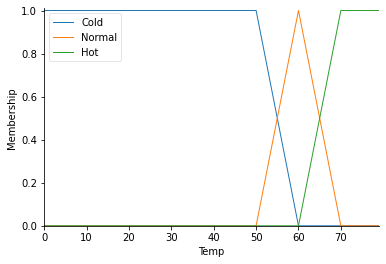

In [3]:
# Generate fuzzy membership functions for first input temperatur
Temp['Cold']   = fuzz.trapmf(Temp.universe,[0,0,50,60]) 
Temp['Normal'] = fuzz.trimf(Temp.universe,[50,60,70]) 
Temp['Hot']    = fuzz.trapmf(Temp.universe,[60,70,80,80]) 
Temp.view()

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


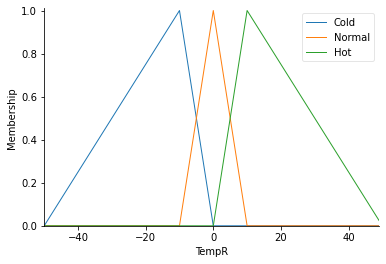

In [4]:
# Generate fuzzy membership functions for Second input rate of change of temperature
TempR['Cold']   = fuzz.trimf(TempR.universe,[-50,-10,0]) 
TempR['Normal'] = fuzz.trimf(TempR.universe,[-10,0,10]) 
TempR['Hot']    = fuzz.trimf(TempR.universe,[0,10,50]) 
TempR.view()

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


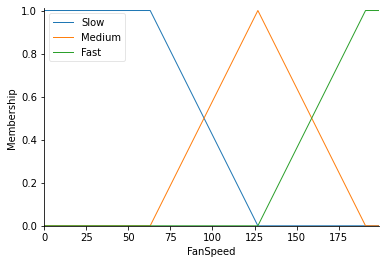

In [5]:
# Generate fuzzy membership functions for output speed
FanSpeed['Slow']   = fuzz.trapmf(FanSpeed.universe,[0,0,63,127]) 
FanSpeed['Medium'] = fuzz.trimf(FanSpeed.universe,[63,127,191]) 
FanSpeed['Fast']    = fuzz.trapmf(FanSpeed.universe,[127,191,200,200]) 
FanSpeed.view()

In [6]:
#Define Rules

rules = []
rules.append(ctrl.Rule(Temp['Cold'] | TempR['Cold'], FanSpeed['Slow']))
rules.append(ctrl.Rule(Temp['Cold'] | TempR['Normal'], FanSpeed['Medium']))
rules.append(ctrl.Rule(Temp['Cold'] | TempR['Hot'], FanSpeed['Fast']))

rules.append(ctrl.Rule(Temp['Normal'] | TempR['Cold'], FanSpeed['Medium']))
rules.append(ctrl.Rule(Temp['Normal'] | TempR['Normal'], FanSpeed['Medium']))
rules.append(ctrl.Rule(Temp['Normal'] | TempR['Cold'], FanSpeed['Fast']))

rules.append(ctrl.Rule(Temp['Hot'] | TempR['Cold'], FanSpeed['Medium']))
rules.append(ctrl.Rule(Temp['Hot'] | TempR['Normal'], FanSpeed['Fast']))
rules.append(ctrl.Rule(Temp['Hot'] | TempR['Cold'], FanSpeed['Fast']))

In [7]:
# create a control system via:
FanSpeed_ctrl = ctrl.ControlSystem(rules)

In [8]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
fanSpeedingSimu = ctrl.ControlSystemSimulation(FanSpeed_ctrl)

In [9]:
fanSpeedingSimu.input['Temp'] = 45
fanSpeedingSimu.input['TempR'] = 50
fanSpeedingSimu.compute()

In [10]:
fanSpeedingSimu.output['FanSpeed']

94.23053892215569

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


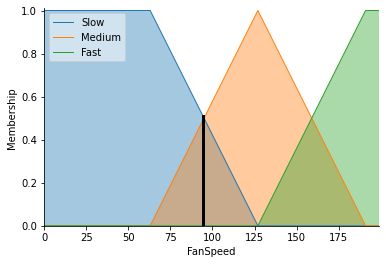

In [11]:
FanSpeed.view(sim=fanSpeedingSimu)

In [12]:
# REF:
#      https://www.researchgate.net/profile/Tun-Tun-Win/publication/332098358_IoT_based_Hydroponic_Temperature_and_Humidity_Control_System_using_Fuzzy_Logic/links/5c9f80f1299bf11169520746/IoT-based-Hydroponic-Temperature-and-Humidity-Control-System-using-Fuzzy-Logic.pdf